# **Bank Marketing Dataset- Machine Learning CW**

This notebook demonstrates the process of applying machine learning techniques to predict whether a client will subscribe to a term deposit using the Bank Marketing dataset from the UCI repository. The workflow includes data loading, cleaning, feature engineering, feature selection, model training, hyperparameter tuning, and evaluation of Random Forest and Neural Network classifiers.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [4]:
#Load the dataset and create data frame
df = pd.read_csv('bank-full.csv',delimiter = ';')

In [5]:
#Displaying the first few rows of the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
#show information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.shape

(45211, 17)

In [8]:
#Summary of the statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# Display unique values for categorical features
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].unique())


job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ['unknown' 'failure' 'other' 'success']
y ['no' 'yes']


#**Exploratory Data Analysis**


*   Find Unwanted Columns



*   Find Missing Values
*   Find Features with only one value

*   Explore Categorical Features

*   Relationship between Categorical Features and Target Label
*   Explore Numerical Features

*   Relationship between Continuos Numerical Features and Target label


*   Find Outliers in Numerical Features
*   Correlation Matrix for Numerical Features


*   Check if the dataset is balanced



**1. Find Unwanted Columns**


*   No unwanted columns



**2. Finding Missing Values**

In [10]:
features_with_missing_values = [features for features in df.columns if df[features].isnull().sum() >0]
for feature in features_with_missing_values:
  print(feature, np.round(df[feature].isnull().mean(), 3),  ' % missing values')
else:
  print("No missing values found in the dataset")

No missing values found in the dataset


**3. Finding features with only one values**

In [11]:
for column in df.columns:
    print(column,df[column].nunique())
if df[column].nunique() == 1:
    print("The columns are: ", column)
else:
  print("\nNo features with only one value in the dataset")

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2

No features with only one value in the dataset


**4. Explore the Categorical Features**

In [12]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [13]:
for feature in categorical_features:
    print('\nThe feature: {} \nThe number of categories: {}'.format(feature,len(df[feature].unique())))


The feature: job 
The number of categories: 12

The feature: marital 
The number of categories: 3

The feature: education 
The number of categories: 4

The feature: default 
The number of categories: 2

The feature: housing 
The number of categories: 2

The feature: loan 
The number of categories: 2

The feature: contact 
The number of categories: 3

The feature: month 
The number of categories: 12

The feature: poutcome 
The number of categories: 4


**5. Relationship between Categorical Features and Taregt Label**

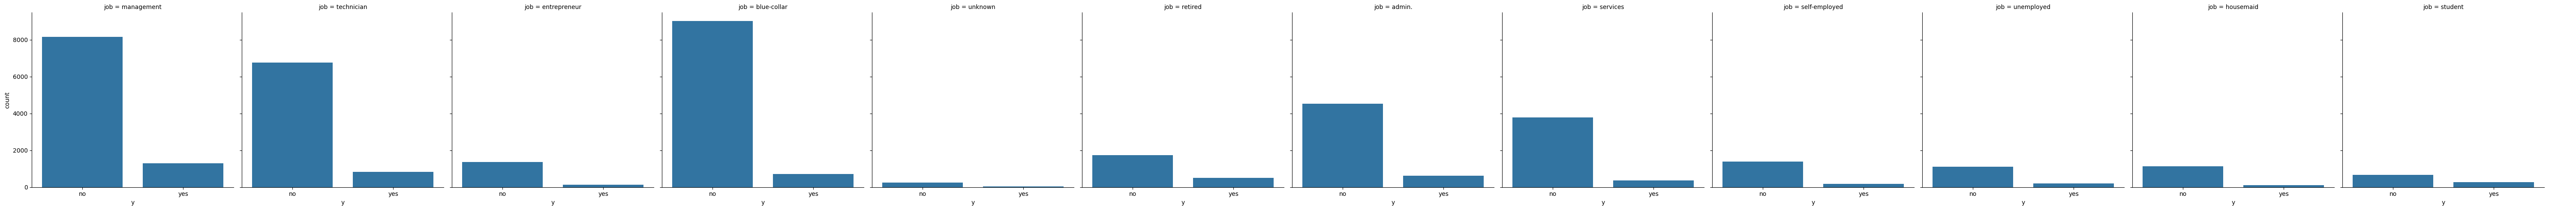

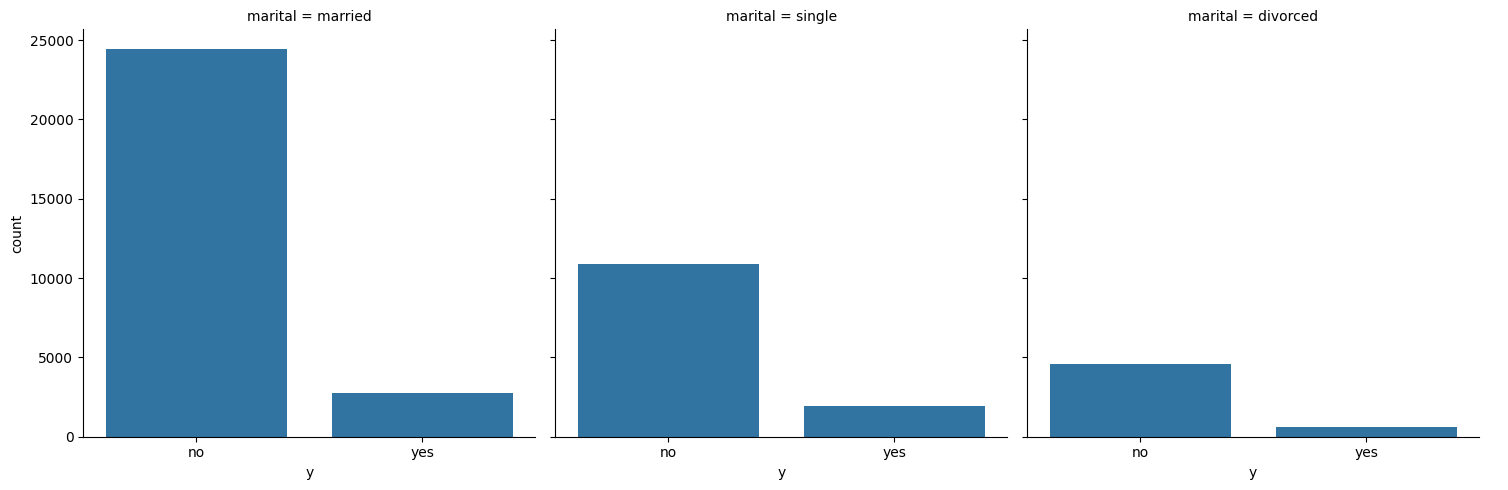

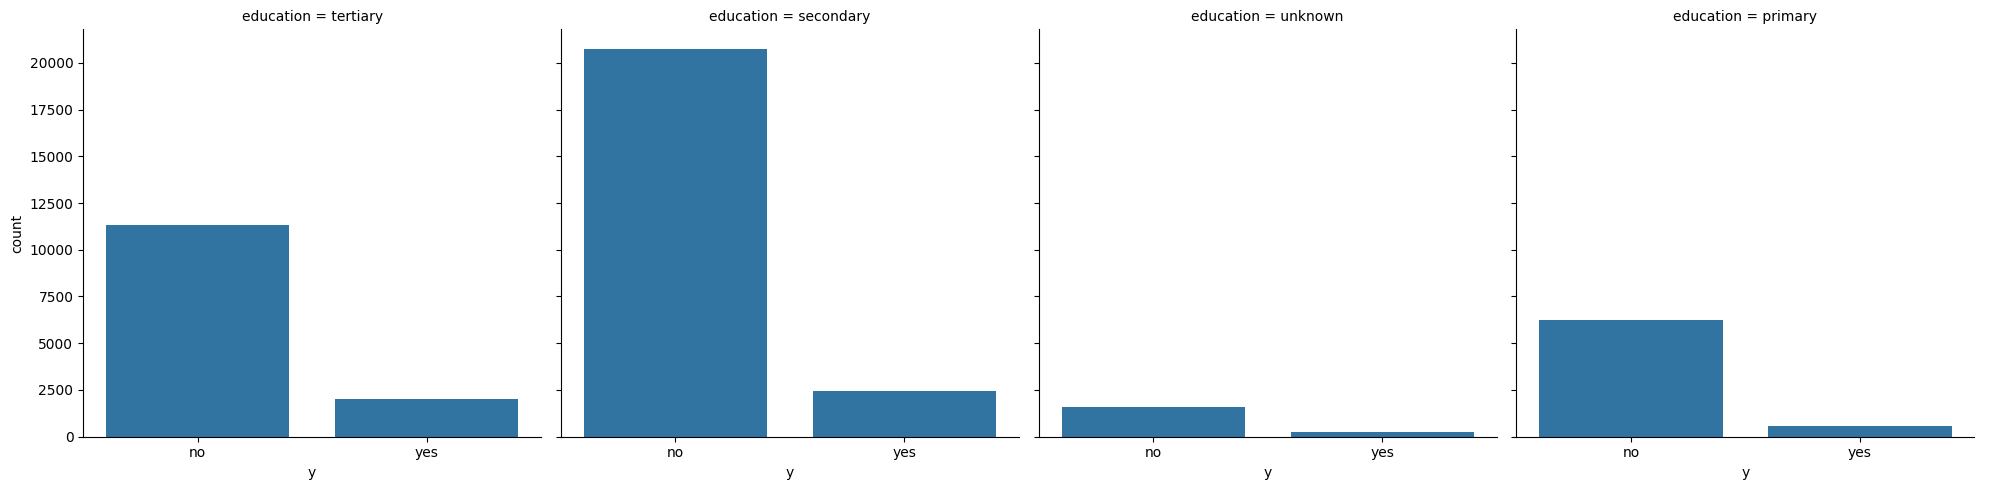

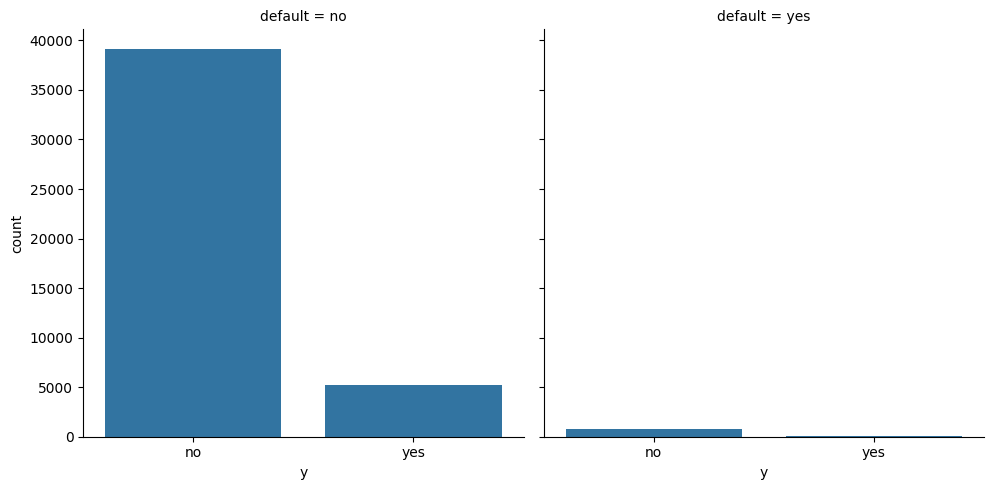

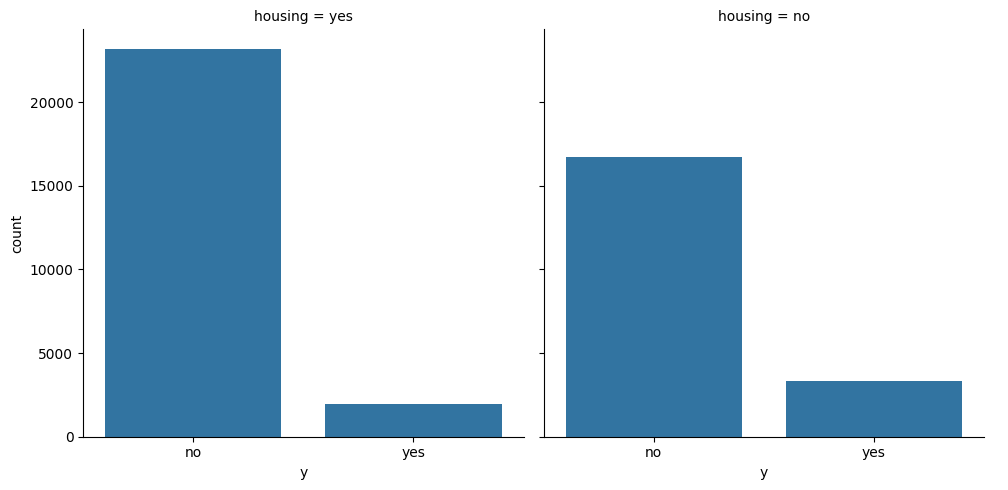

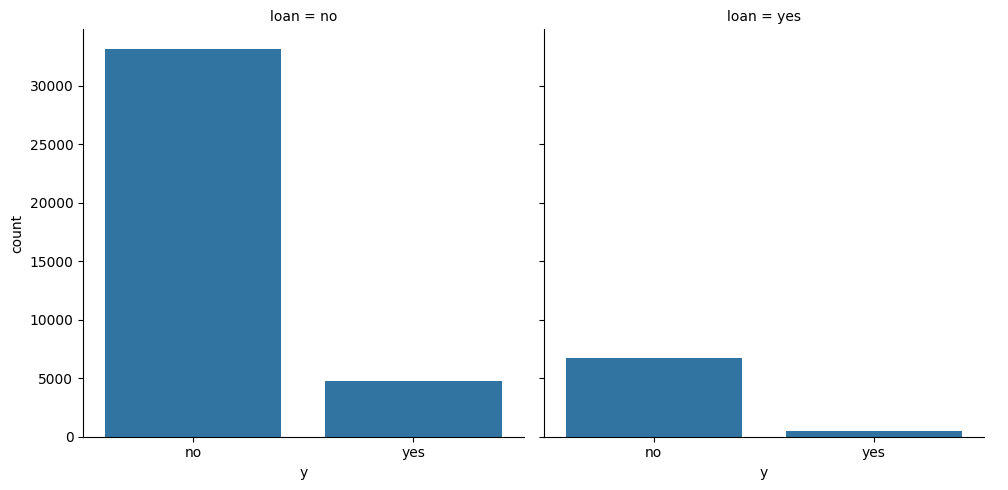

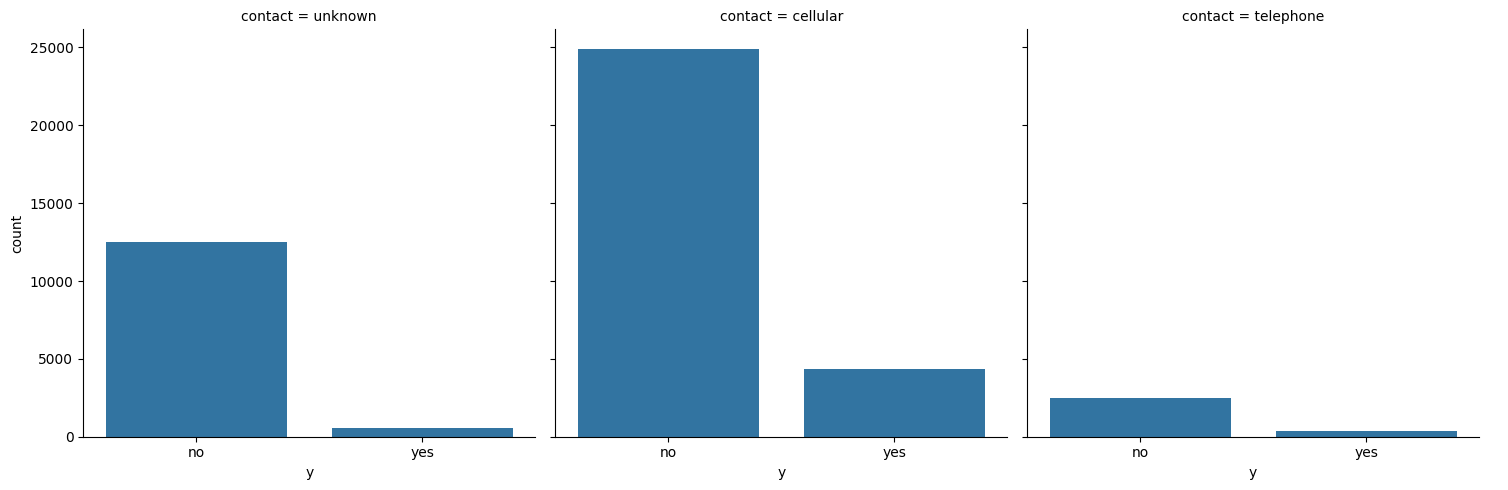

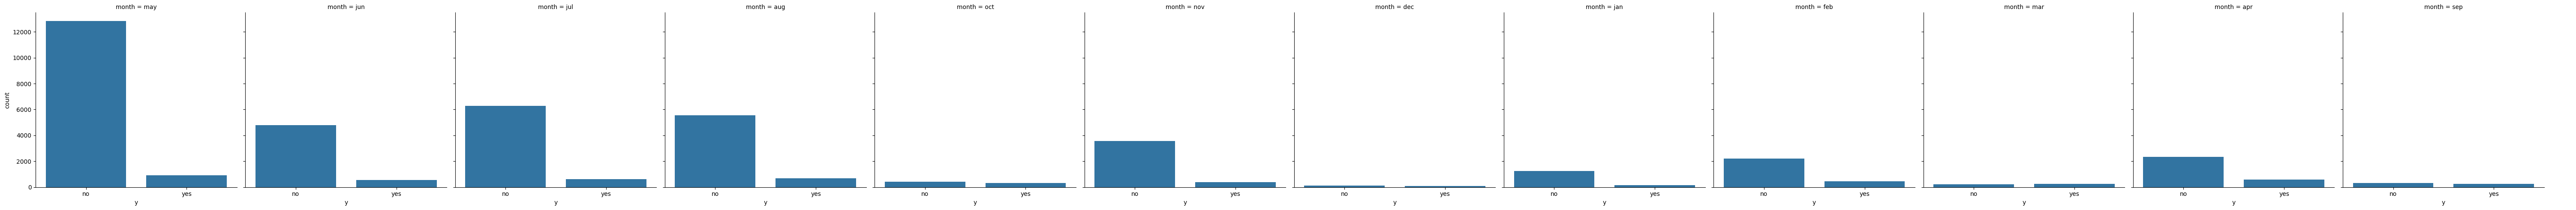

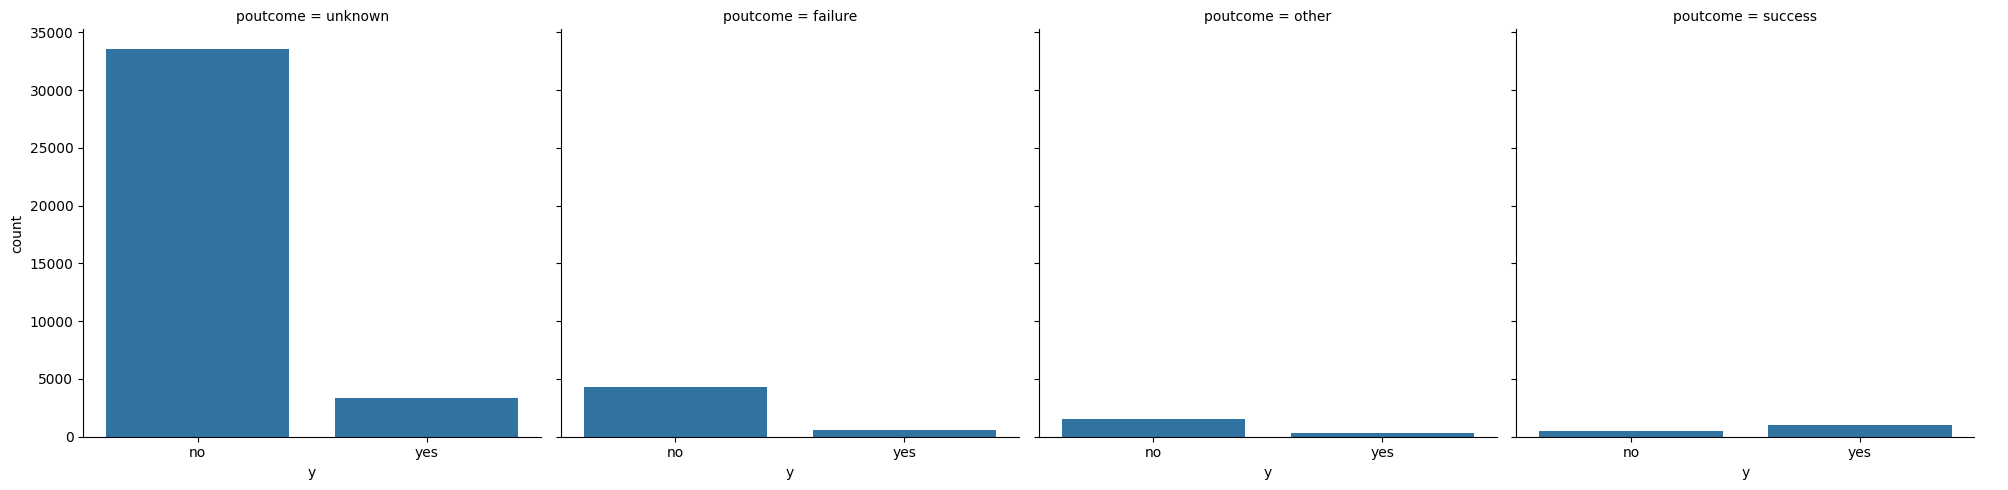

In [14]:
#displays how the target label split over categorical features
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()

In [15]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2


**6. Explore the Numerical Features**

In [16]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


**7. Find Continous Numerical Features**

In [17]:
continuous_features=[feature for feature in numerical_features if feature not in ['y']]
print("Continuous feature Count is  {}".format(len(continuous_features)))

Continuous feature Count is  7


**8. Relationship between continuos numerical features and Target labels**

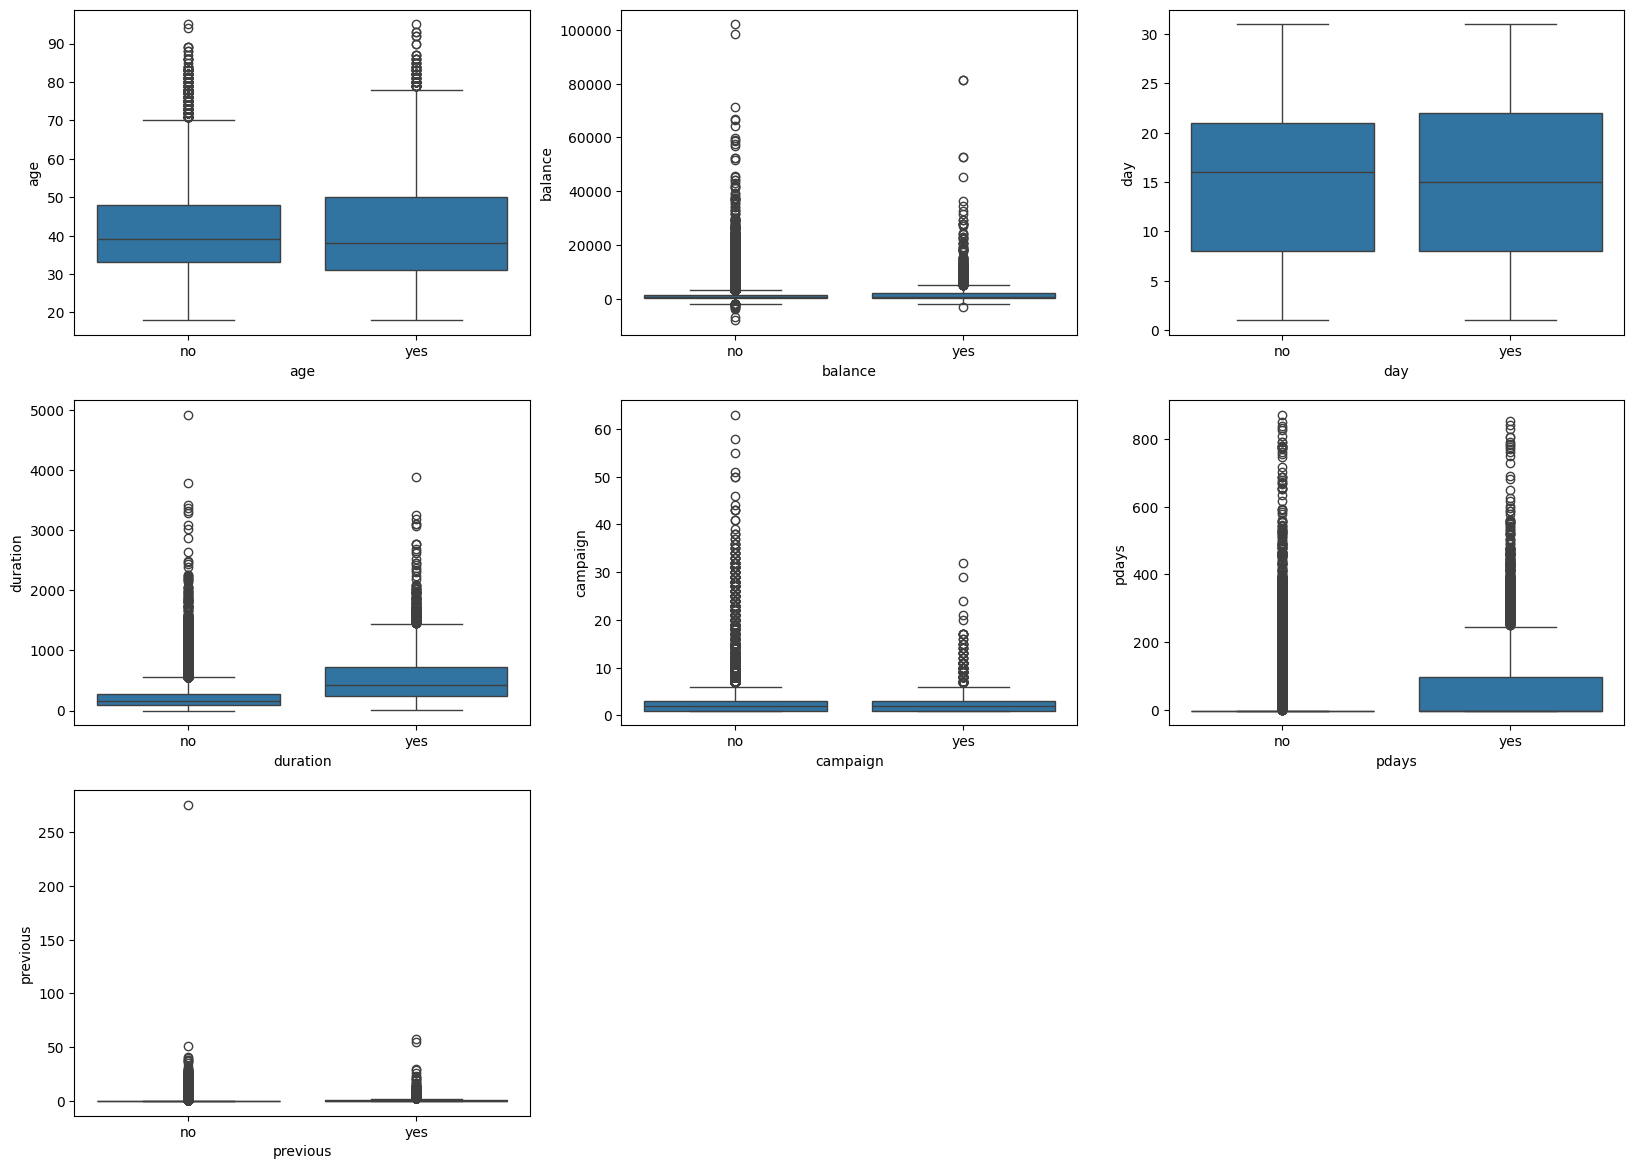

In [18]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

**9. Find Outliers in numerical features**

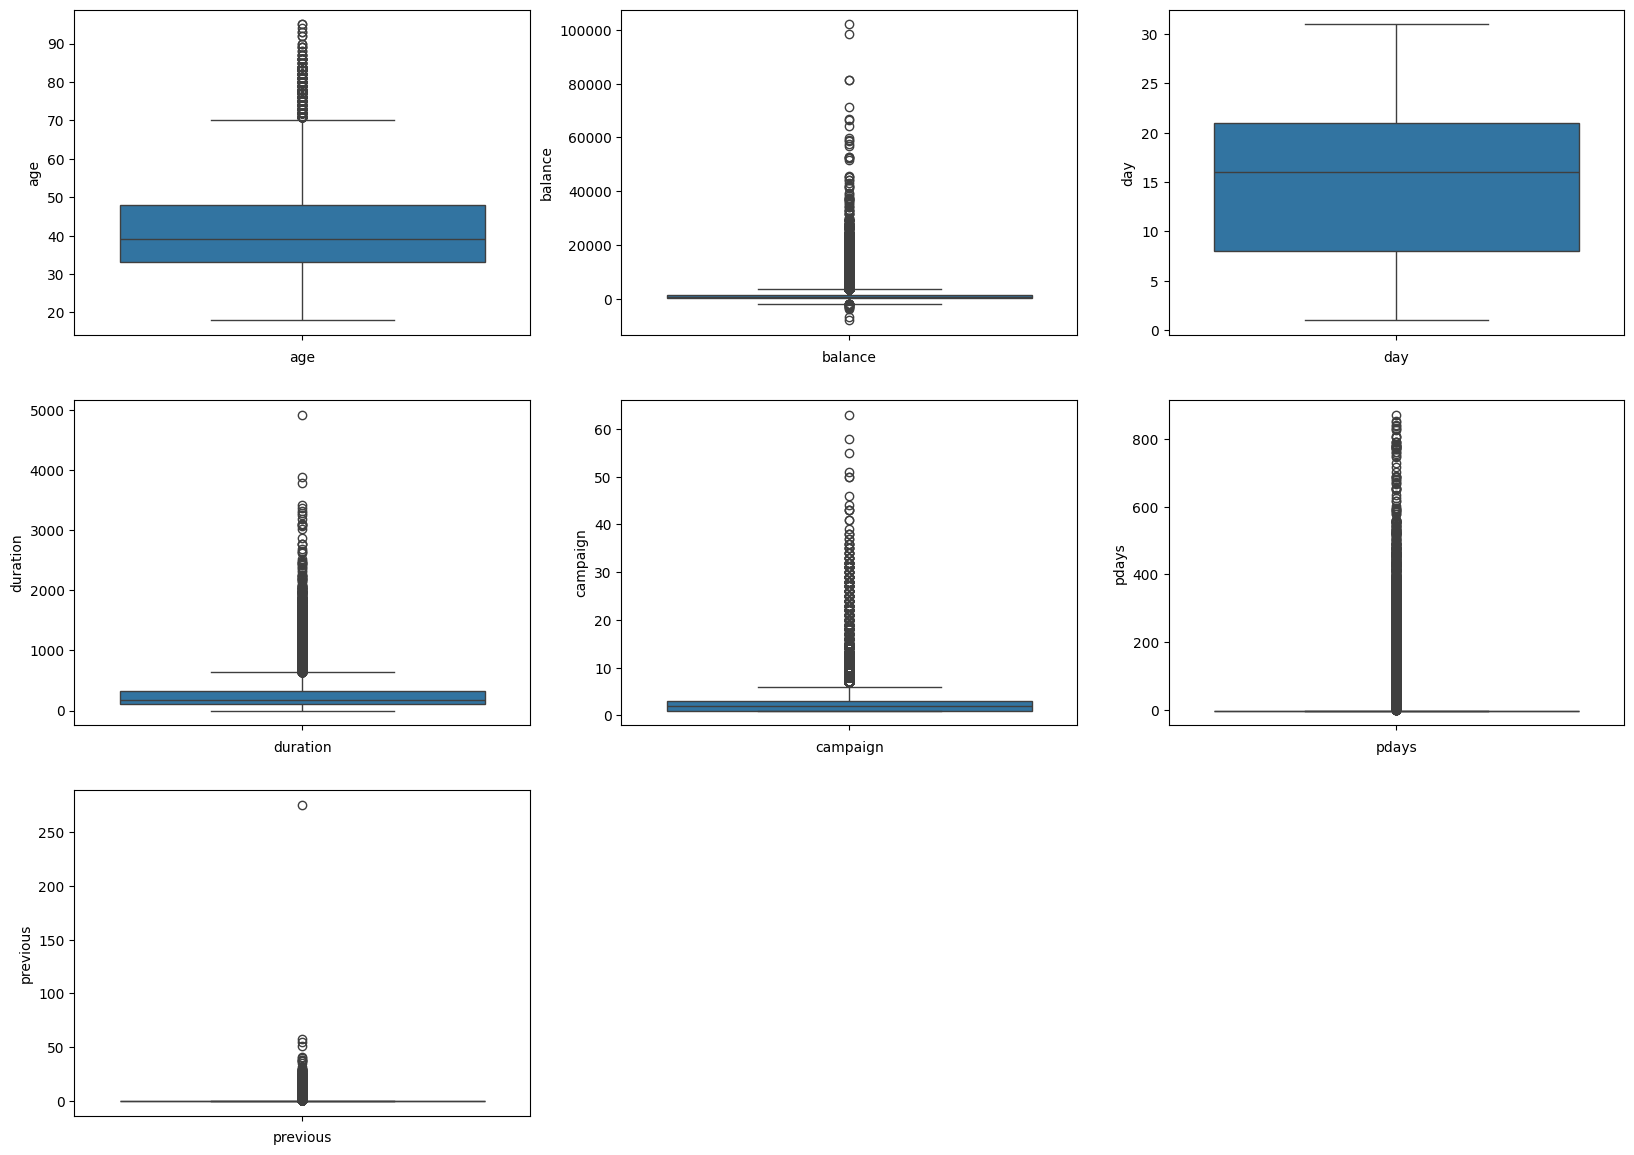

In [19]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

**10.Explore the Correlation between numerical features**

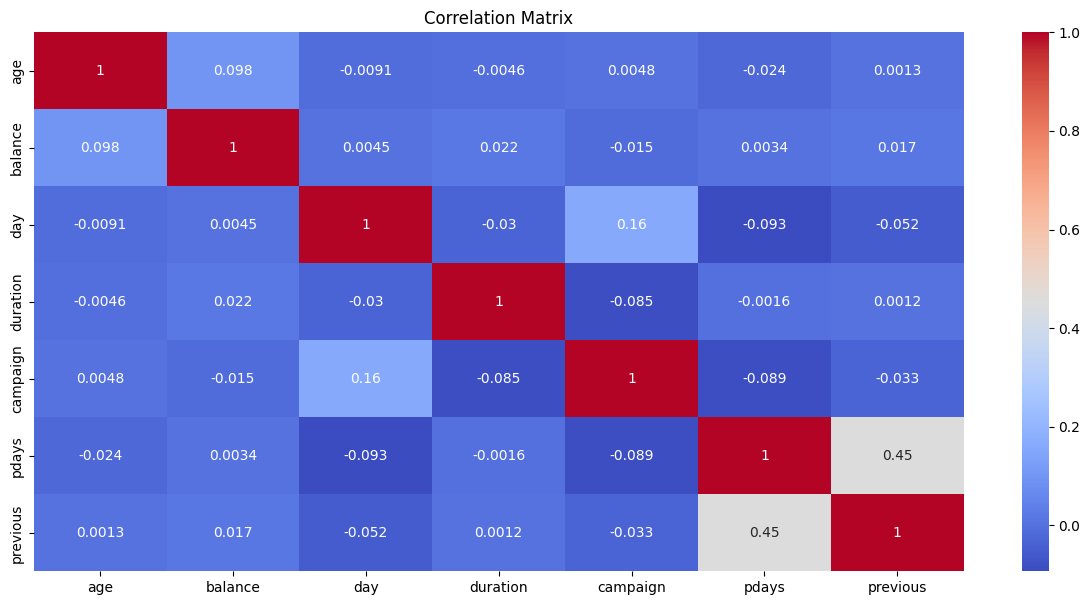

In [20]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
cor_mat = numeric_df.corr()

# Plot heatmap
fig = plt.figure(figsize=(15, 7))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**11.Check if the dataset is balanced**

In [21]:
df['y'].groupby(df['y']).count()

,y
y,
no,39922
yes,5289


#Feature Engineering


In [22]:
df2=df.copy()

In [23]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
#Rename the Target column name 'y' to 'deposit'
df2.rename(columns={'y': 'deposit'}, inplace=True)

In [25]:
#default features do not play important role
df2.groupby(['deposit','default']).size()

deposit  default
no       no         39159
         yes          763
yes      no          5237
         yes           52
dtype: int64

In [26]:
# Drop 'default' as it has low impact
df2.drop(['default'],axis=1, inplace=True)

In [27]:
df2.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       33570
          1           9
          2          35
          3           1
          4           1
                  ...  
yes       804         1
          805         1
          828         1
          842         1
          854         1
Length: 914, dtype: int64

In [28]:
# Drop 'pdays' due to high occurrence of -1
df2.drop(['pdays'],axis=1, inplace=True)

**Remove outliers**

In [29]:
# feature age
df2.groupby('age',sort=True)['age'].count()

,age
age,
18,12
19,35
20,50
21,79
22,129
...,...
90,2
92,2
93,2


These values can be ignored

In [30]:
#feature balance
df2.groupby(['deposit','balance'],sort=True)['balance'].count()

deposit  balance
no       -8019      1
         -6847      1
         -4057      1
         -3372      1
         -3313      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 9258, dtype: int64

These outlier should not be remove as balance goes high, client show interest on deposit


In [31]:
#feature duration
df2.groupby(['deposit','duration'],sort=True)['duration'].count()

deposit  duration
no       0            3
         1            2
         2            3
         3            4
         4           15
                     ..
yes      3094         1
         3102         1
         3183         1
         3253         1
         3881         1
Name: duration, Length: 2627, dtype: int64

These outliers should not be removed as duration goes high, client show interest on deposit


In [32]:
# feature campaign
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
                     ...  
yes      20              1
         21              1
         24              1
         29              1
         32              1
Name: campaign, Length: 70, dtype: int64

In [33]:
# Remove outliers for 'campaign'
df3 = df2[df2['campaign'] < 33]

In [34]:
df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
         6            1199
         7             688
         8             508
         9             306
         10            252
         11            185
         12            151
         13            127
         14             89
         15             80
         16             77
         17             63
         18             51
         19             44
         20             42
         21             34
         22             23
         23             22
         24             19
         25             22
         26             13
         27             10
         28             16
         29             15
         30              8
         31             12
         32              8
yes      1            2561
         2            1401
         3             618
         4             317
         5             139
         6              92
         7              47
         8              32
         9              21
         10             14
         11             16
         12              4
         13              6
         14              4
         15              4
         16              2
         17              6
         20              1
         21              1
         24              1
         29              1
         32              1
Name: campaign, dtype: int64

In [35]:
#Feature previous
df3.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           33532
         1            2189
         2            1650
         3             848
         4             543
                     ...  
yes      26              1
         29              1
         30              1
         55              1
         58              1
Name: previous, Length: 66, dtype: int64

In [36]:
# Remove outliers for 'previous'
df4 = df3[df3['previous'] < 31]

In [37]:
print(df4.columns)

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'deposit'],
      dtype='object')


In [38]:
# One-Hot Encode Categorical Features
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)


In [39]:
# Encode Boolean Features
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [40]:
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,58,2143,5,261,1,0,False,False,False,True,...,True,False,False,False,False,False,True,1,0,0
1,44,29,5,151,1,0,False,False,False,False,...,True,False,False,False,False,False,True,1,0,0
2,33,2,5,76,1,0,False,True,False,False,...,True,False,False,False,False,False,True,1,1,0
3,47,1506,5,92,1,0,True,False,False,False,...,True,False,False,False,False,False,True,1,0,0
4,33,1,5,198,1,0,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0


#Split Dataset into Training and Test set

In [41]:
X = df4.drop(['deposit_new'],axis=1)
y = df4['deposit_new']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)


In [42]:
len(X_train)

36128

In [43]:
len(X_test)

9033

#Balancing Data set Using SMOTE

In [44]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=0)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Original training set shape: {X_train.shape}, {y_train.value_counts()}")
print(f"Balanced training set shape: {X_train_balanced.shape}, {y_train_balanced.value_counts()}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Original training set shape: (36128, 40), deposit_new
0    31924
1     4204
Name: count, dtype: int64
Balanced training set shape: (63848, 40), deposit_new
0    31924
1    31924
Name: count, dtype: int64


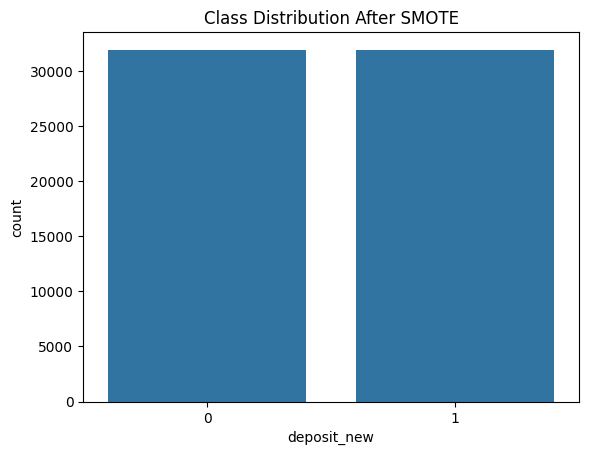

In [45]:
sns.countplot(x=y_train_balanced)
plt.title("Class Distribution After SMOTE")
plt.show()

#Model Selection

In [46]:
#two models are RandomForestClassifier and Neural Network(MLPClassifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score
import matplotlib.pyplot as plt

In [47]:
#Cross-validation score for Random Forest
rf_model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train_balanced, y=y_train_balanced, cv=5)
print(rf_model_score)
print("random forest scores mean: ",rf_model_score.mean())

# Cross-validation score for Neural Network
nn_model_score = cross_val_score(estimator=MLPClassifier(max_iter=1000, random_state=0), X=X_train_balanced, y=y_train_balanced, cv=5)
print(nn_model_score)
print("neural network scores mean: ",nn_model_score.mean())


[0.73351605 0.96953798 0.96656226 0.96937896 0.97078863]
random forest scores mean:  0.9219567763131306
[0.73476899 0.93555208 0.96061081 0.91675151 0.95434255]
neural network scores mean:  0.9004051854981349


In [48]:
#create parameters per model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, max_features='sqrt', criterion='gini', random_state=0)
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.001, max_iter=1000, random_state=0)


In [49]:
# Train and evaluate Random Forest
rf_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Metrics:
Accuracy: 0.8497730543562493
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      7950
           1       0.41      0.60      0.49      1083

    accuracy                           0.85      9033
   macro avg       0.68      0.74      0.70      9033
weighted avg       0.88      0.85      0.86      9033

Confusion Matrix:
 [[7024  926]
 [ 431  652]]


In [50]:
# Train and evaluate Neural Network
nn_model.fit(X_train_balanced, y_train_balanced)
y_pred_nn = nn_model.predict(X_test)
y_pred_nn_prob = nn_model.predict_proba(X_test)[:, 1]

print("Neural Network Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

Neural Network Metrics:
Accuracy: 0.8755673641093767
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      7950
           1       0.48      0.56      0.52      1083

    accuracy                           0.88      9033
   macro avg       0.71      0.74      0.72      9033
weighted avg       0.88      0.88      0.88      9033

Confusion Matrix:
 [[7306  644]
 [ 480  603]]


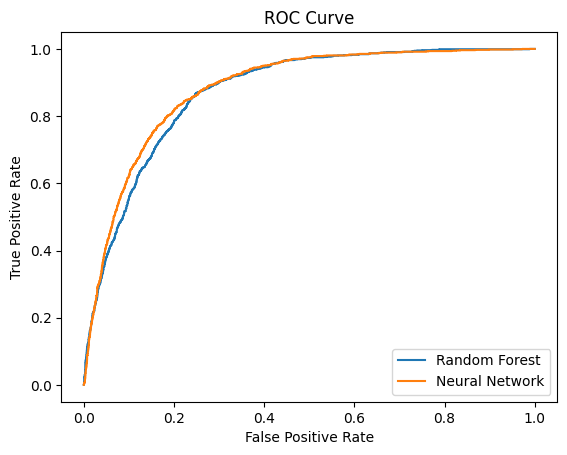

In [51]:
# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn_prob)

plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_nn, tpr_nn, label='Neural Network')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [52]:
# Tabular comparison
results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Random Forest': [
        accuracy_score(y_test, y_pred_rf),
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'],
        roc_auc_score(y_test, y_pred_rf_prob)
    ],
    'Neural Network': [
        accuracy_score(y_test, y_pred_nn),
        classification_report(y_test, y_pred_nn, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_nn, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_nn, output_dict=True)['1']['f1-score'],
        roc_auc_score(y_test, y_pred_nn_prob)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


      Metric  Random Forest  Neural Network
0   Accuracy       0.849773        0.875567
1  Precision       0.413181        0.483561
2     Recall       0.602031        0.556787
3   F1-Score       0.490041        0.517597
4    ROC AUC       0.872709        0.882420
